[View in Colaboratory](https://colab.research.google.com/github/stanimman/Simple/blob/master/Sanity_Testing.ipynb)

In [1]:
!pip uninstall Pillow -y

!pip install Pillow
# Need to restart to get the Pillow version to be changed in 5.2.0

Uninstalling Pillow-4.0.0:
  Successfully uninstalled Pillow-4.0.0
    100% |████████████████████████████████| 2.0MB 7.9MB/s 


In [2]:
import PIL
print(PIL.PILLOW_VERSION)

4.0.0


In [1]:
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.0-{platform}-linux_x86_64.whl torchvision
import torch
print(torch.__version__)
print(torch.cuda.is_available())

import torch 
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms

from torch.utils.data import DataLoader, Dataset
from torchvision.datasets.folder import pil_loader
from torchvision import transforms, utils
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io, transform
import matplotlib.pyplot as plt
import os
from torchvision import  models
import torch.nn as nn
import torch.optim as optim
import copy
from torch.optim import lr_scheduler
import time
import datetime as dt
from PIL import Image

tcmalloc: large alloc 1073750016 bytes == 0x5c902000 @  0x7f9c667251c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8
0.4.0
True


In [5]:
from google.colab import files
uploaded = files.upload()

Saving Sample1.zip to Sample1.zip


In [6]:
!unzip Sample1.zip

Archive:  Sample1.zip
   creating: Sample/
  inflating: Sample/.DS_Store        
   creating: __MACOSX/
   creating: __MACOSX/Sample/
  inflating: __MACOSX/Sample/._.DS_Store  
   creating: Sample/MURA-v1.1/
  inflating: Sample/MURA-v1.1/.DS_Store  
   creating: __MACOSX/Sample/MURA-v1.1/
  inflating: __MACOSX/Sample/MURA-v1.1/._.DS_Store  
   creating: Sample/MURA-v1.1/train/
  inflating: Sample/MURA-v1.1/train/.DS_Store  
   creating: __MACOSX/Sample/MURA-v1.1/train/
  inflating: __MACOSX/Sample/MURA-v1.1/train/._.DS_Store  
  inflating: Sample/MURA-v1.1/train/train_XR_FINGER.csv  
  inflating: __MACOSX/Sample/MURA-v1.1/train/._train_XR_FINGER.csv  
   creating: Sample/MURA-v1.1/train/XR_FINGER/
  inflating: Sample/MURA-v1.1/train/XR_FINGER/.DS_Store  
   creating: __MACOSX/Sample/MURA-v1.1/train/XR_FINGER/
  inflating: __MACOSX/Sample/MURA-v1.1/train/XR_FINGER/._.DS_Store  
   creating: Sample/MURA-v1.1/train/XR_FINGER/patient03227/
  inflating: Sample/MURA-v1.1/train/XR_FINGER/pati

In [0]:
train_path_df = pd.read_csv('Sample/MURA-v1.1/train/train_XR_FINGER.csv')
valid_path_df = pd.read_csv('Sample/MURA-v1.1/valid/valid_XR_FINGER.csv')

In [0]:
class MuraImageDataset(Dataset):
    """Mura dataset."""
    def __init__(self, df, root_dir, transform=None):
        """
        Args:
            df (dataframe): Path to the image file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.df = df
        self.root_dir = root_dir
        self.transform = transform
    def __len__(self):
        return len(self.df)
    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir,
                                self.df.iloc[idx, 0])
        #print(img_name)
        image = pil_loader(img_name)
        labels = self.df.iloc[idx, 2]
        labels = labels.astype('float')
        if self.transform:
            image = self.transform(image)
        return [image, labels]


In [13]:
transformed_train_dataset = MuraImageDataset(df=train_path_df,
                                    root_dir='/content/Sample',
                                    transform=transforms.Compose([
                                               #transforms.ToPILImage(),
                                               transforms.RandomRotation(10),
                                               transforms.RandomSizedCrop(224),
                                               transforms.RandomHorizontalFlip(),
                                               transforms.ToTensor()
                                           ]))
transformed_valid_dataset = MuraImageDataset(df=valid_path_df,
                                    root_dir='/content/Sample',
                                    transform=transforms.Compose([
                                               #transforms.ToPILImage(),
                                               transforms.RandomRotation(10),
                                               transforms.RandomSizedCrop(224),
                                               transforms.RandomHorizontalFlip(),
                                               transforms.ToTensor()
                                           ]))
transformed_train_dl = DataLoader(transformed_train_dataset,batch_size=8)
transformed_valid_dl = DataLoader(transformed_valid_dataset,batch_size=8)

/usr/local/lib/python3.6/dist-packages/torchvision/transforms/transforms.py:563: UserWarning: The use of the transforms.RandomSizedCrop transform is deprecated, please use transforms.RandomResizedCrop instead.
  "please use transforms.RandomResizedCrop instead.")


torch.Size([8, 3, 224, 224]) torch.Size([8])
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)


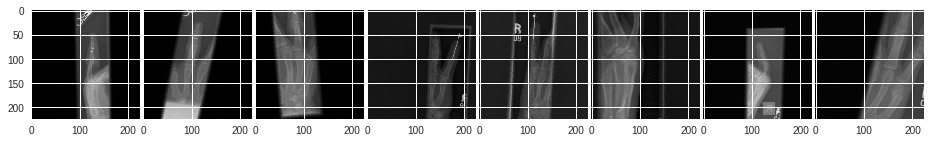

In [14]:
from mpl_toolkits.axes_grid1 import AxesGrid, ImageGrid
#@title Default title text
## imshow works when we have transformed the image using some transformation
def imshow(axis, inp):
    """Denormalize and show"""
    inp = inp.numpy().transpose((1, 2, 0)) ## This line of code corrects the dimension issue that occurs during transformation 
    #mean = np.array([0.485, 0.456, 0.406])
    #std = np.array([0.229, 0.224, 0.225])
    #inp = std * inp + mean
    #inp = np.clip(inp, 0, 1)
    axis.imshow(inp)

img, label = next(iter(transformed_train_dl))
print(img.size(), label.size())
fig = plt.figure(1, figsize=(16, 8))
grid = ImageGrid(fig, 111, nrows_ncols=(1, 8), axes_pad=0.05)  
for i in range(img.size()[0]):
  #print(img)
  ax = grid[i]
  imshow(ax,img[i])
  print(label[i])

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
## This function just evaluate the loss / optimize  and returns model and the weight of the epoch which has highest accuracy
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        # Each epoch has a training and validation phase
        # In train phase they are settting 2 variable in model class - train() and schedular  = step()
        # In Validation phase setting the model class - eval()
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode
            running_loss = 0.0
            running_corrects = 0
            # Iterate over data.# phase - train or validation
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
                labels = labels.type(torch.cuda.LongTensor)
                # zero the parameter gradients
                optimizer.zero_grad()
                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    
                    print(outputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                print(phase,preds,labels.data)
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            #print(preds[1:10],labels.data[1:10])
            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
        print()
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))
    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [40]:
# Load Pretrained model

#model_ft = models.resnet18(pretrained=True)
model_ft = models.densenet169(pretrained=True)

# Freeze specific layers of the model

#freeze_till('transition3.conv.weight',model_ft)

# num_ftrs = model_ft.fc.in_features # fc for resnet
num_ftrs = model_ft.classifier.in_features
model_ft.classifier = nn.Linear(num_ftrs, 2)
model_ft = model_ft.to(device)
criterion = nn.CrossEntropyLoss()



# ------- Train all Parameters 
#Observe that all parameters are being optimized (passed) / we have updated all the layer in the resnet architecture by passing model_ft.parameters()
#to the optimizer , again SGD with momentum is preferred over Adam ?? 

#'optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.0001, momentum=0.9)


#----- Train last layer layers only 
#Observe that only parameters of final layer are being optimized as opoosed to before.

optimizer_ft = optim.SGD(model_ft.classifier.parameters(), lr=0.001, momentum=0.9)

#optimizer_ft = optim.Adam(model_ft.fc.parameters(),betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)


#----- Freeze specific layer and train only the unfreezed layers

#optimizer_ft = optim.SGD(list(filter(lambda p: p.requires_grad, model_ft.parameters())),lr=0.000001,momentum=0.9)

#optimizer_ft = optim.Adam(list(filter(lambda p: p.requires_grad, model_ft.parameters())),lr = 0.0000001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

/usr/local/lib/python3.6/dist-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


In [17]:
dataloaders = {"train": transformed_train_dl, "val": transformed_valid_dl}
dataset_sizes = {"train": len(transformed_train_dataset),"val":len(transformed_valid_dataset)}
print(dataset_sizes)

{'train': 9, 'val': 9}


In [27]:
inputs,labels = transformed_train_dl
inputs = inputs[0]
labels = labels[0]
print(inputs.shape)
inputs = inputs.to(device)
labels = labels.to(device)
labels = labels.type(torch.cuda.LongTensor)
print("label --- ", labels.shape)

torch.Size([8, 3, 224, 224])
label ---  torch.Size([1, 3, 224, 224])


In [41]:
for inputs, labels in dataloaders['train']:
                inputs = inputs.to(device)
                labels = labels.to(device)
                labels = labels.type(torch.cuda.LongTensor)
                print(inputs.shape)
                # zero the parameter gradients
                optimizer_ft.zero_grad()
                # forward
                # track history if only in train
                #with torch.set_grad_enabled(phase == 'train'):
                outputs = model_ft(inputs)
                    
                print(outputs.shape)

torch.Size([8, 3, 224, 224])
torch.Size([8, 2])
torch.Size([1, 3, 224, 224])
torch.Size([1, 2])


In [42]:
print(model_ft)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplac

In [0]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=3)